# 군집분석이란?

**1. 군집분석**
 - 서로 **유사한 정도에 따라 다수의 객체를 군집으로 나누는 작업** 또는 이에 기반한 분석을 의미한다.
 - 유사도가 높은 데이터끼리 그룹화(대표적으로 유클리드 거리계산식을 이용)
 - 계층형 클러스트링과 비계층형 클러스트링으로 분류
 - 주요 알고리즘 : k-means, hierarchical 등
<br>
<br>

**2. 군집분석의 특징**
 - 종속변수(y)가 없는 데이터 마이닝 기법(비지도 학습)
 - 유클리드 거리 기반 유사 객체 묶음(유사성 = 유클리드 거리)
 - <span style= 'color:aqua'>분석 결과에 대한 가설 검정 없음</span>(타당성 검증 방법 없음)
 - 계층적 군집분석(탐색적), 비계층적 군집분석(확인적)
<br>
<br>

**3. 계층적 군집분석(hierarchical)**
 - 유클리드 거리를 이용한 군집분석 방법
 - 계층적으로 군집 결과 도출
 - 탐색적 군집분석
 - 계층적 군집분석의 결과 
     > 덴드로그램(Dendrogram)<br>
     : 표본들이 군을 형성하는 과정을 나타내는 나무형식의 그림
 - 군집 수는 사용자가 정의할 수 있음
 <br>
 <br>
 
**4. 비계층적 군집분석(k-means)**
  - **계층적 군집분석보다 속도 빠름**
  - 군집의 수를 알고 있는 경우 이용
  - k는 미리 정하는 군집수
  - 확인적 군집분석
  - <span style= 'color:aqua'>**계층적 군집화의 결과에 의거** 하여 군집 수 결정</span>
  - <span style= 'color:aqua'>변수보다 관측대상 군집화에 많이 이용</span>
  - **군집의 중심(cluster center)은 사용자가 정함
<br>
<br>

**5. k-means 군집분석 알고리즘**
 - 1) k값을 초기값으로 <span style= 'color:aqua'>**k개의 centroid** 선정(랜덤)</span>
 - 2) 각 데이터 포인터를 가장 가까운 centroid에 할당
 - 3) centroid에 할당된 모든 데이터의 중심 위치 계산(centroid 재조정)
 - 4) 재조정된 centroid와 가장 가까운 데이터 포인트 할당
 - 5) centroid 재조정이 발생되지 않을 때까지 3,4 단계를 반복함

In [1]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

In [2]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

mpl.rc('axes', unicode_minus=False)
mpl.rcParams['font.family'] = 'batang'

sns.set_style('dark') # 노트
sns.set(color_codes=True)
plt.rc('figure', figsize=(10,8))

warnings.filterwarnings('ignore')

# hierarchical_계층적 군집분석
- 유클리드 거리계산식 이용

In [3]:
from sklearn.datasets import load_iris
# 계층적 군집분석 함수
from scipy.cluster.hierarchy import linkage, dendrogram
## dendrogram : 나무형식 그림

iris = load_iris()

In [ ]:
X, y = load_iris(True) # return_X_y = True

In [4]:
# feature_names
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
cols = ['sepal_length','sepal_width','petal_length','petal_width']
iris_df = pd.DataFrame(iris.data, columns=cols)
iris_df['labels'] = iris.target
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,labels
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## 계층적 군집 분석
- 연결 방식 단순연결(single, 최근접), 완전연결(complete), 평균연결(average)
- 거리 계산 유클리드(euclidean)


In [7]:
# 데이터프레임 형태로 가져와야함
cluster = linkage(y=iris_df, method='complete', metric='euclidean')
cluster.shape

(149, 4)

- raw데이터가 150인데 완전연결이더라도 유실 데이터가 생겼다는 것이 확인

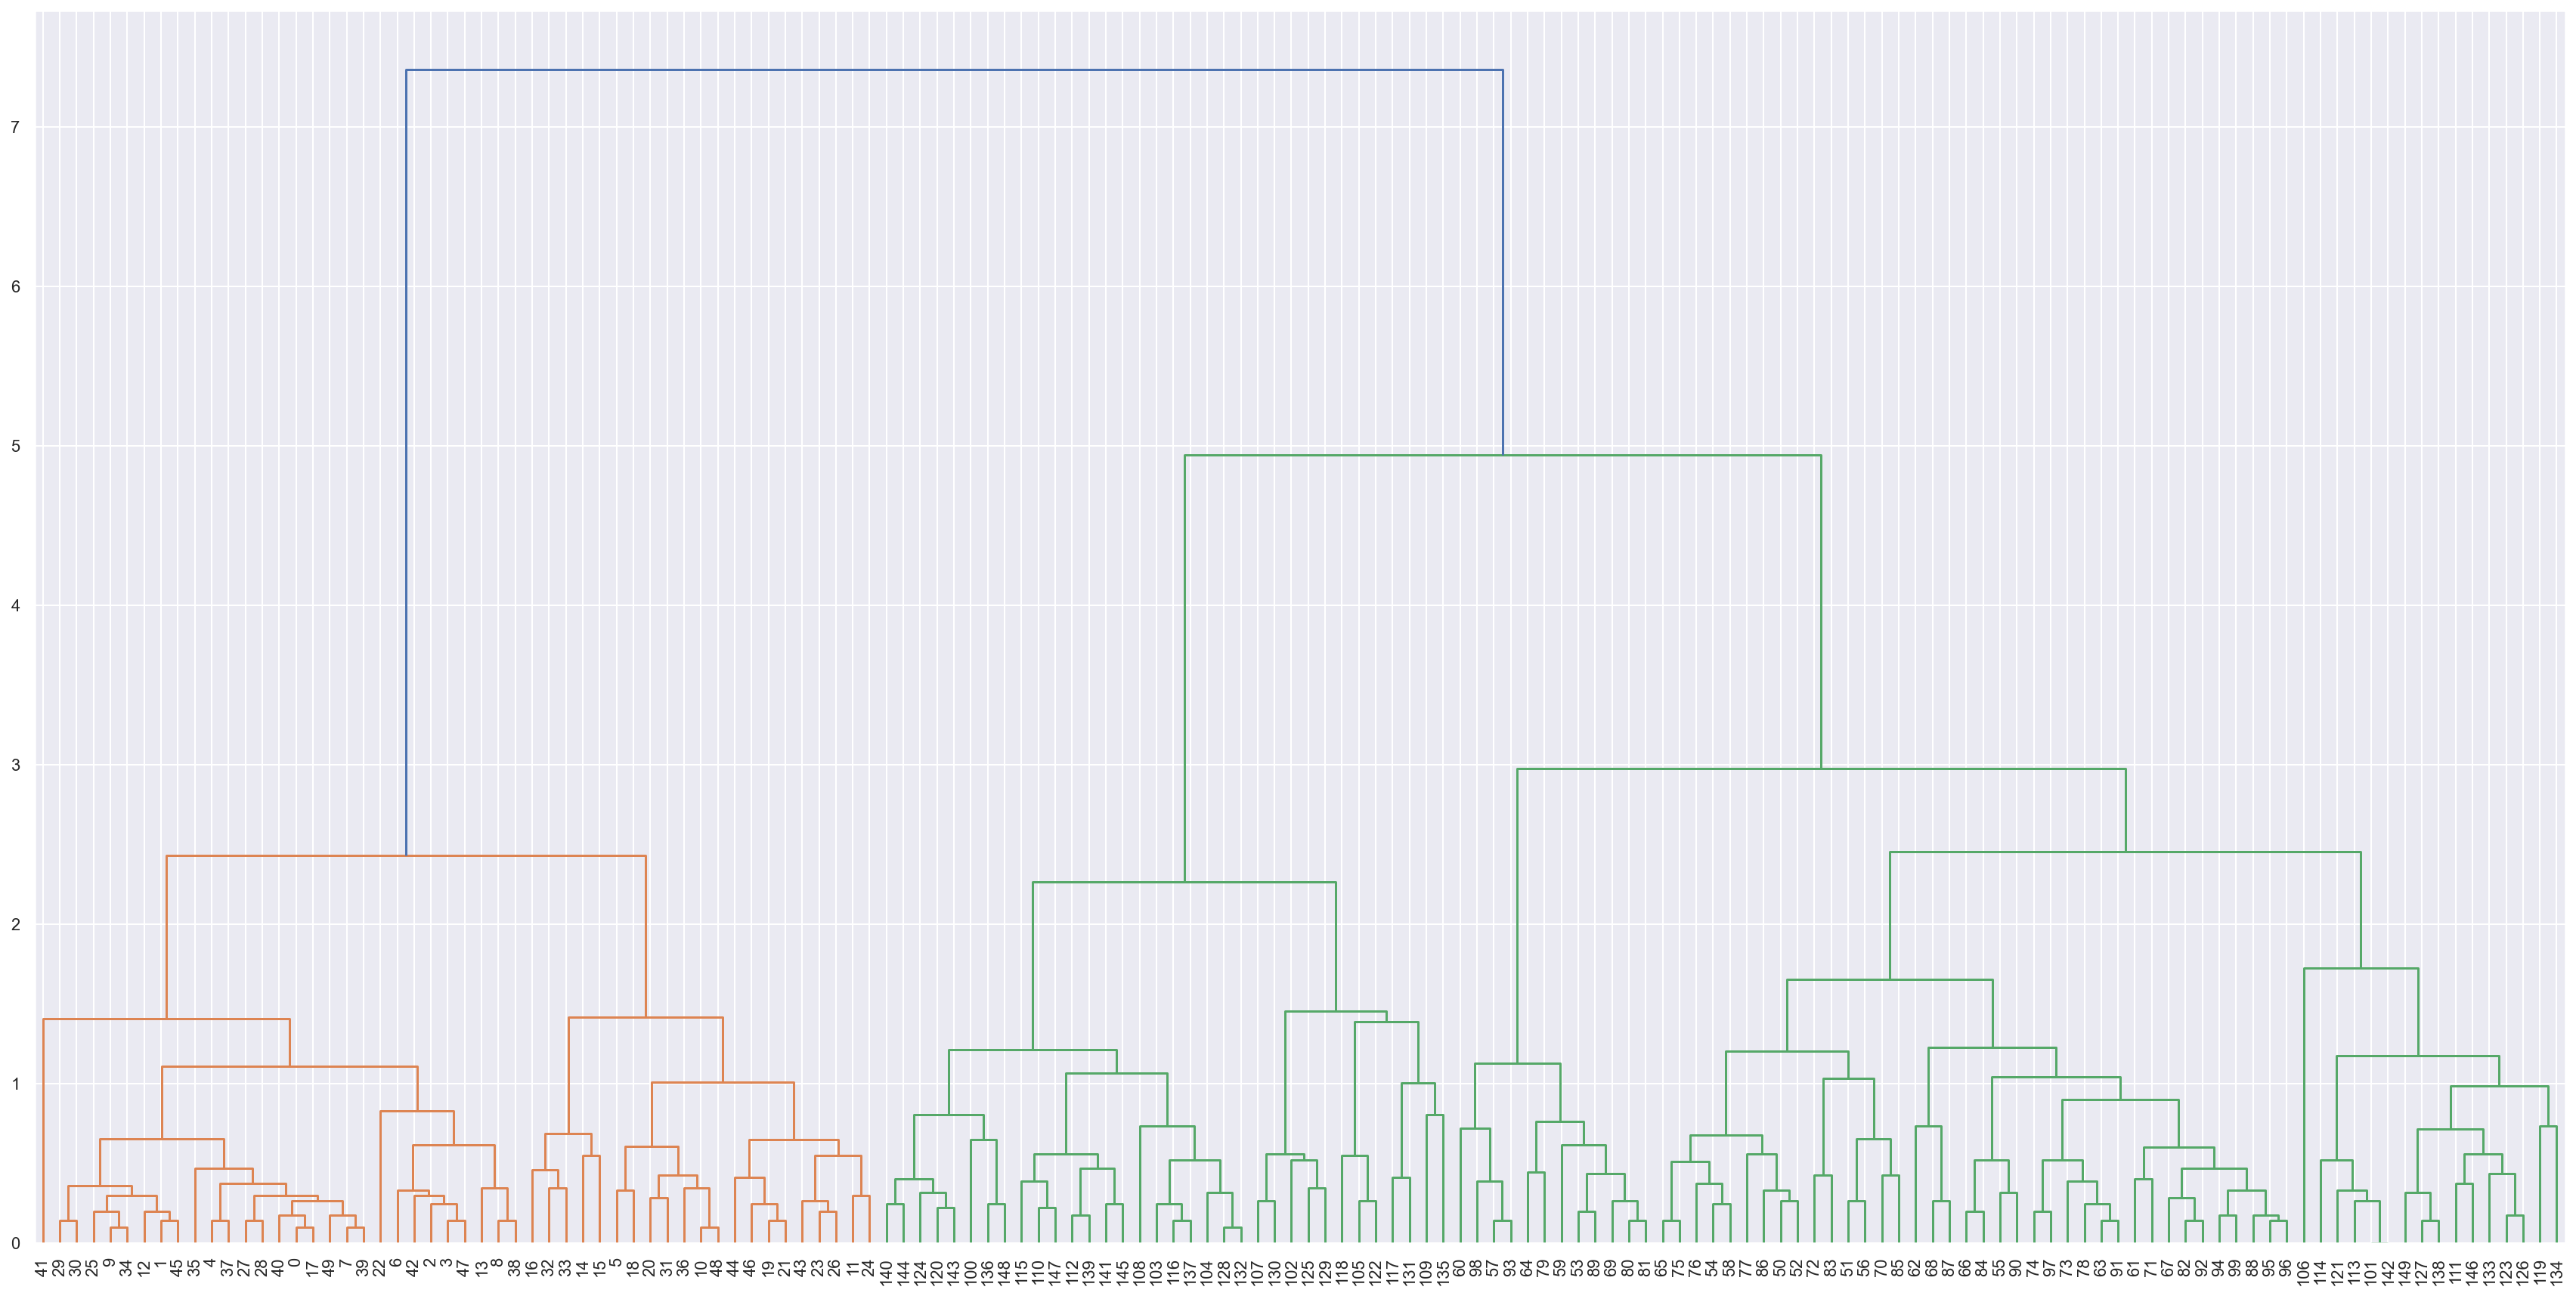

In [8]:
# 군집수 결정 : 덴드로그램 시각화
# figsize 조정
plt.figure(figsize=(30,15))

# 시각화
dendrogram(cluster, leaf_rotation=90, leaf_font_size=11)
## 글자 각도조정(leaf_rotation)

plt.show()

In [9]:
# 클러스트링 결과
from scipy.cluster.hierarchy import fcluster # 지정한 클러스트의 수로 자르는 함수

cut_tree = fcluster(cluster, t = 3, criterion = 'distance') # 거리기준으로 자르겠담

# prediction
cut_tree

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2,
       2, 3, 2, 3, 3, 2, 2, 2, 2, 3, 2, 3, 2, 3, 2, 2, 3, 3, 2, 2, 2, 2,
       2, 3, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 3], dtype=int32)

In [10]:
labels = iris_df['labels'] # 정답이니 cut_tree에 타깃도 함께 보기
df = pd.DataFrame({'pred':cut_tree, 'labels':labels})
df
# 이렇게 출력하면 알아보기 힘드니깐

,pred,labels
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
145,2,2
146,3,2
147,2,2
148,2,2


In [11]:
con_mat = pd.crosstab(df['pred'],df['labels']) # 두개의 값을 교차로 행렬을 만들라는것
con_mat

labels,0,1,2
pred,,,
1,50,0,0
2,0,0,34
3,0,50,16


In [12]:
# iris_df에 군집화 예측치 추가
iris_df['cluster'] = cut_tree
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,labels,cluster
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1


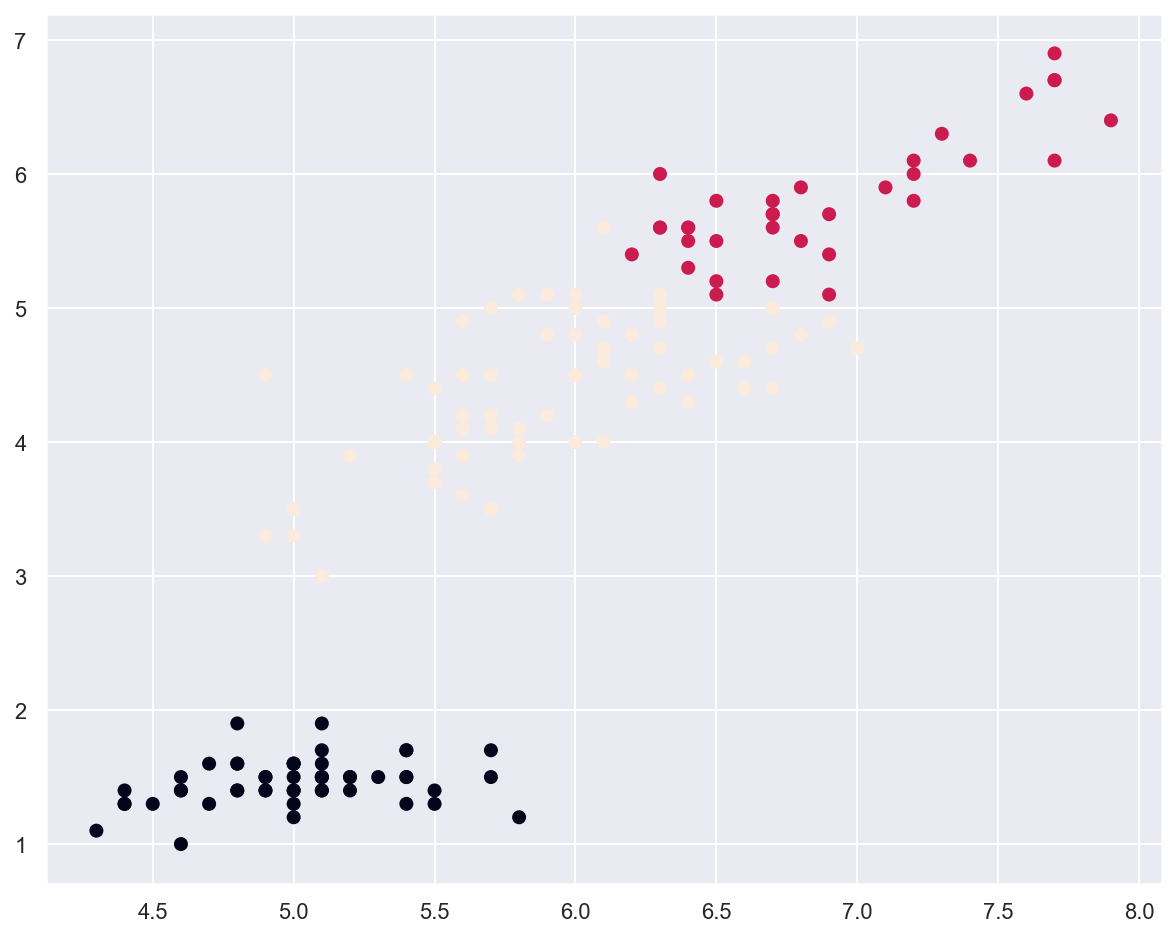

In [16]:
# 클러스터로 분리된 값 시각화
plt.scatter(x = iris_df['sepal_length'], y = iris_df['petal_length'], c=iris_df['cluster'])
plt.show()

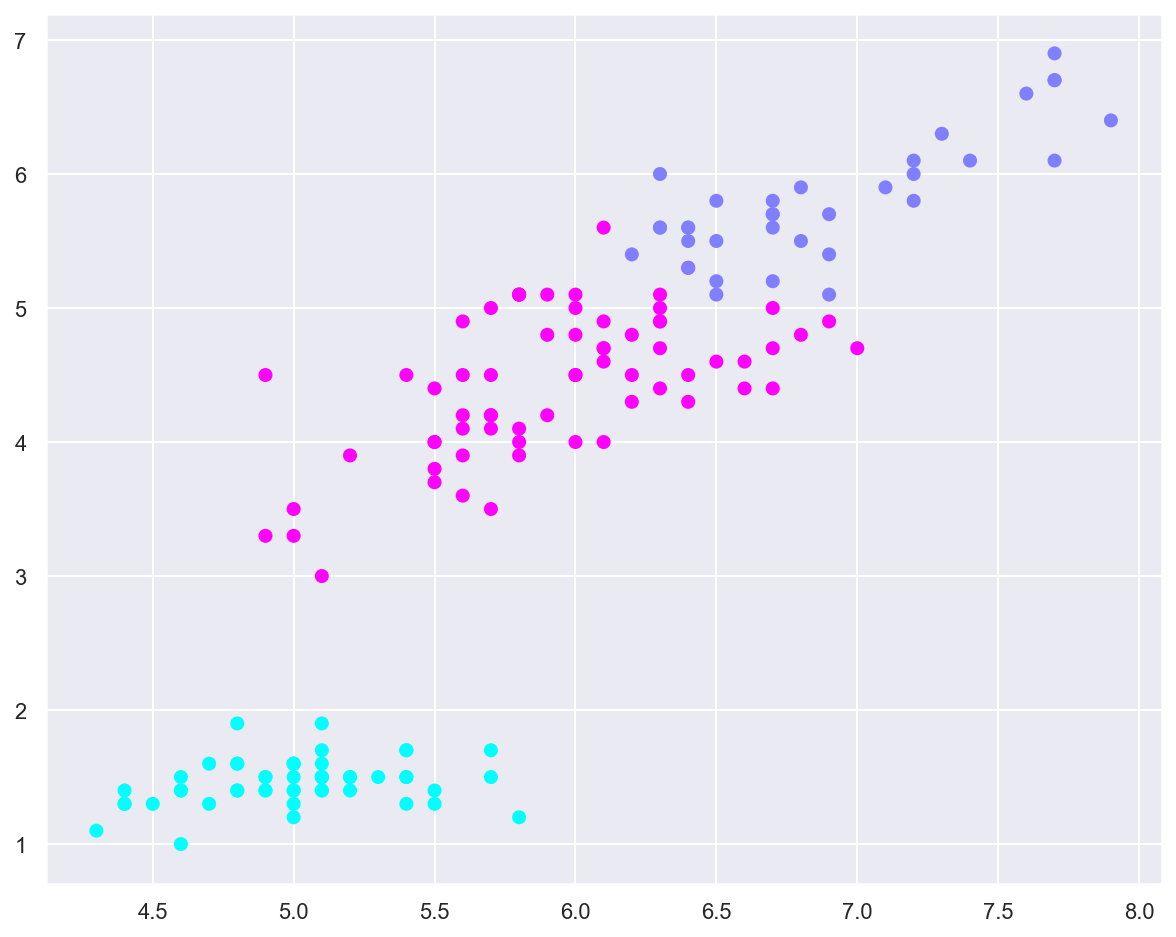

In [26]:
plt.scatter(x = iris_df['sepal_length'], y = iris_df['petal_length'],
            c=iris_df['cluster'], cmap='cool')
plt.show()

In [17]:
# 클러스터 빈도수
iris_df['cluster'].value_counts()

3    66
1    50
2    34
Name: cluster, dtype: int64

In [20]:
# 각 클러스터별 통계
cluster_g = iris_df.groupby('cluster').mean()
cluster_g

,sepal_length,sepal_width,petal_length,petal_width,labels
cluster,,,,,
1,5.006000,3.428000,1.462000,0.246000,0.000000
2,6.888235,3.100000,5.805882,2.123529,2.000000
3,5.939394,2.754545,4.442424,1.445455,1.242424


# k-means : 비계층적 군집분석

In [27]:
iris_df.head() # 위에 쓰던건 안되니 새롭게

,sepal_length,sepal_width,petal_length,petal_width,labels,cluster
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1


In [28]:
# target을 제외한 feature를 이용하여 df생성
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns = cols)
df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [30]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters =3, init='k-means++', max_iter=300, random_state=0)
kmeans.fit(df)

KMeans(n_clusters=3, random_state=0)

In [31]:
# 군집후 생성된 라벨
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [34]:
# 크기 확인
df['target'] = iris.target
df['cluster'] = kmeans.labels_  # 라벨값 피처에 담기

iris_result = df.groupby(['target','cluster']).size()
iris_result

target  cluster
0       1          50
1       0          48
        2           2
2       0          14
        2          36
dtype: int64

In [39]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# 스케일 데이터 사용
ss = StandardScaler(iris.data)
scaled = ss.fit(iris.data)

# PCA차원축소 2개
pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris.data)

df['pca_x'] = pca_transformed[:, 0]
df['pca_y'] = pca_transformed[:,1]
df.head()


,sepal_length,sepal_width,petal_length,petal_width,target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,0,1,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,0,1,-2.728717,0.326755


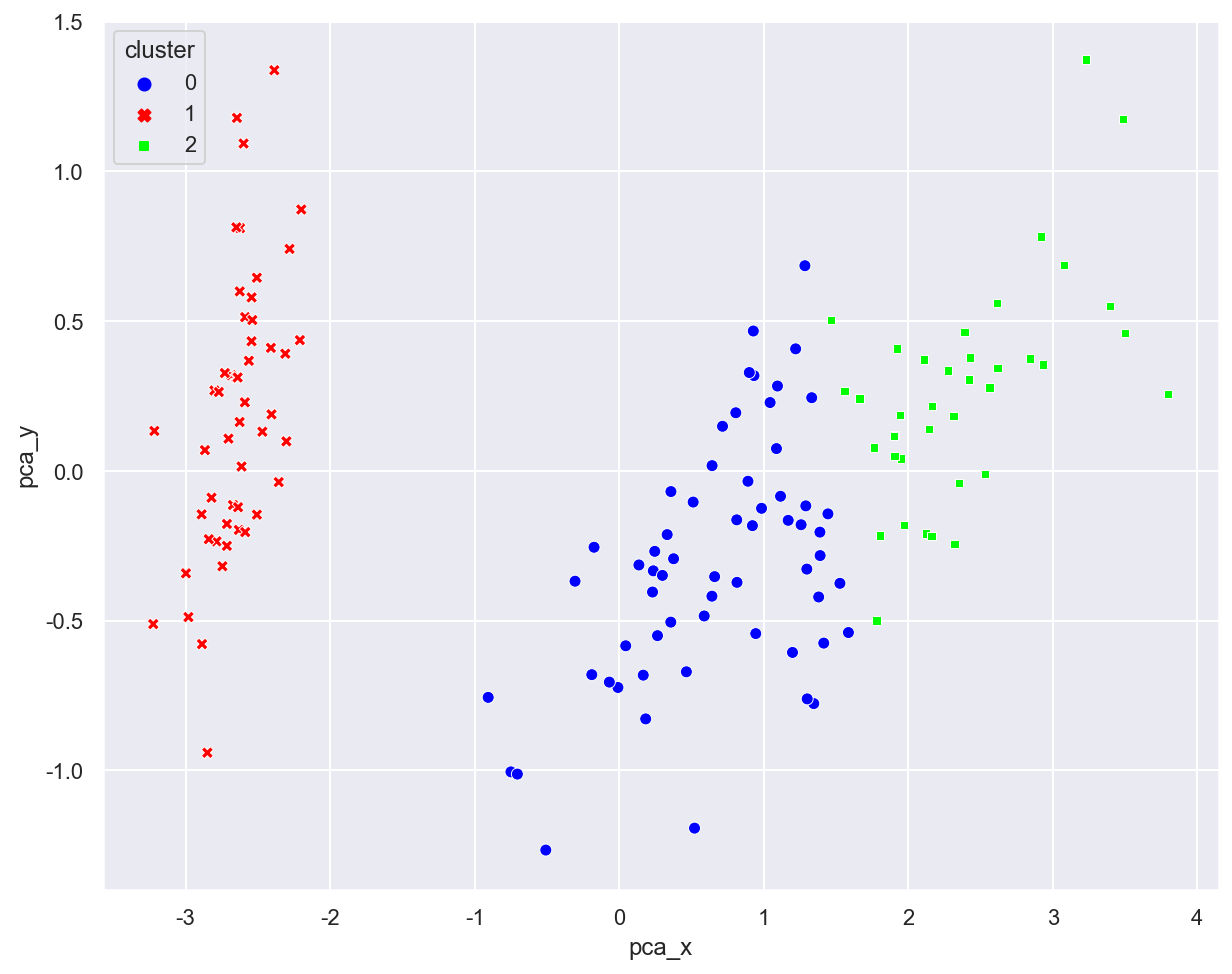

In [47]:
sns.scatterplot(x='pca_x', y='pca_y', data = df, hue='cluster',
               style ='cluster', palette='brg')
plt.show()

In [53]:
# 클러스터링 결과 예측
pred = kmeans.predict(df[['sepal_length','sepal_width','petal_length','petal_width']])
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [54]:
len(pred)

150

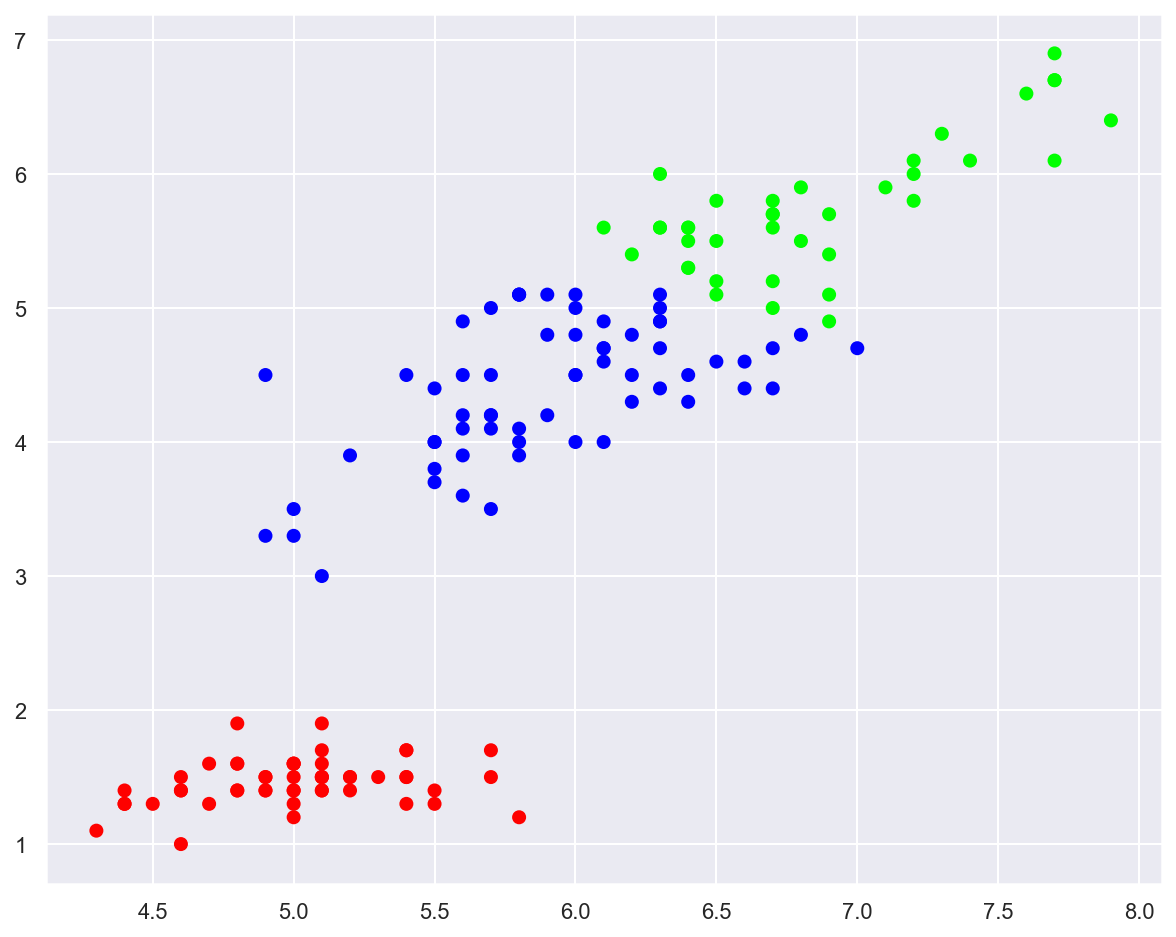

In [55]:
plt.scatter(x=df['sepal_length'], y=df['petal_length'], c=pred, cmap='brg')
plt.show()

In [56]:
# 중앙값
centers = kmeans.cluster_centers_
centers

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

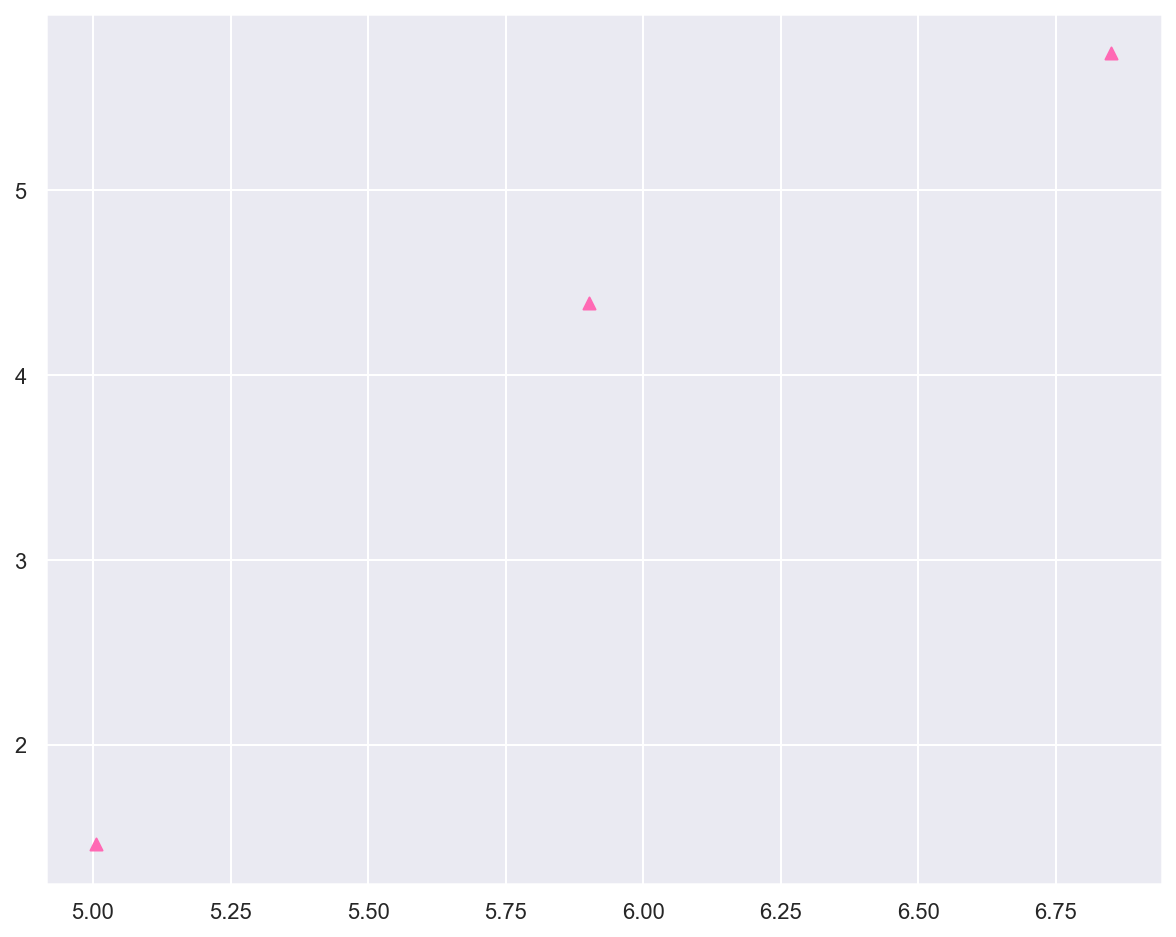

In [59]:
#군집별 중앙값 시각화
plt.scatter(x=centers[:,0], y=centers[:,2], marker='^', c='hotpink')
plt.show()

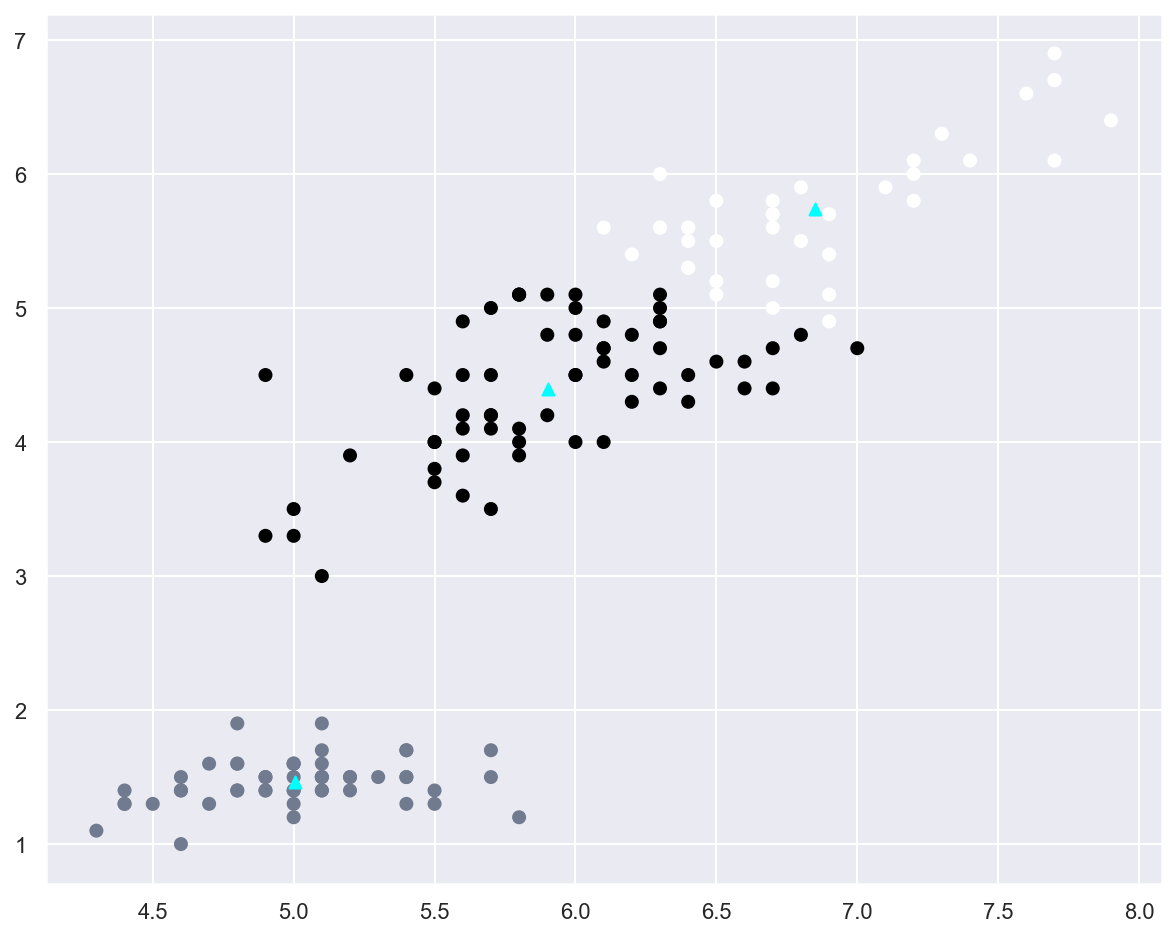

In [74]:
# 군집결과와 중앙값을  함께 시각화
plt.scatter(x=df['sepal_length'], y=df['petal_length'], c=pred, cmap='bone')
plt.scatter(x=centers[:,0], y=centers[:,2], marker='^', c='cyan')
plt.show()